# Assignment [CSE445]
## Data : Investigating the career trajectory of NSU Alumni (Responses)
### Tasks:
1. Conduct the cleaning on the data if there is any:
    1. Empty cells
    2. Data in wrong format
    3. Wrong data
    4. Duplicates
    
2. Organize the data into a JSON file and then read this JSON data.

3. Do you think scaling is necessary in this case? Justify

4. Develop necessary hypothesis that might support your understanding on the developed datasets

5. Calculate the relationship between each column in your data set. The find out the most valuable features that will support you hypothesis and you will do your further analysis and data mining task. For this use seaborn python library to visualize the correlation matrix


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("data.csv")
data.head()

,Timestamp,Email Address,Gender,Cumulative Grade Point Average(CGPA),Total year now since your graduation,Fields of research interest,Number of publications,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Programming languages you know,Frameworks you know,Did you start working as a software engineer after graduation?,What was the name of the company you worked for right after your graduation? if your answer is not write N/A.,What was your starting salary range?,Did you have any Start-ups after graduation?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.,Where did you start working after completing your higher studies?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8/24/2023 23:03:30,dewanaminul12@gmail.com,Male,3 to < 3.5,1,"Internet of Things(IoT) and Embedded Systems, ...",1 - 5,No,Yes,Yes,Yes,"C, C++, HTML",Not interested,No,Venturous Professional Institute,BDT 15K - 25K,No,United States of America (USA),Florida Atlantic University,Industry
2,8/25/2023 3:21:54,tanzilshahria@gmail.com,Male,3.5 to 4,4,"Machine Learning, Artificial Intelligence, Nat...",More than 10,Yes,Yes,Yes,Yes,"C, Java, Python, C++, R",Laravel,No,AST International Limited,> 25K - 40K,No,United States of America (USA),University of Wisconsin-Milwaukee,NaN
3,8/25/2023 3:27:49,progga.tasnim@gmail.com,Female,3.5 to 4,3,Human-Computer interaction,1 - 5,Yes,Yes,Yes,Yes,"C, Python, PHP, C++, HTML, CSS, JavaScript, R,...","React, Django, Laravel, Node.js",Yes,"Banglalink (Internship), Therap BD Ltd",> 40K,No,United States of America (USA),Marquette University,NaN
4,8/26/2023 11:45:09,saif.ahmed02@northsouth.edu,Male,3.5 to 4,8,"Machine Learning, Data Science/Data mining, Ar...",6-10,Yes,Yes,Yes,No,"C, Python, R, SQL",Django,No,North South University,BDT 15K - 25K,No,Germany,University of Jena (Abbe School of Photonics),Educational institute


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 20 columns):
 #   Column                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                         --------------  ----- 
 0   Timestamp                                                                                                      64 non-null     object
 1   Email Address                                                                                                  64 non-null     object
 2   Gender                                                                                                         64 non-null     object
 3    Cumulative Grade Point Average(CGPA)                                                                          64 non-null     object
 4   Total year now since your graduation                      

#### We can see the data has 65 rows and 20 columns
#### And the Data types are of object types
#### Thus, it tells us that the dataset contains a lot of Categorical values


In [6]:
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

Rows: 65
Columns: 20


In [7]:
data.columns

Index(['Timestamp', 'Email Address', 'Gender',
       ' Cumulative Grade Point Average(CGPA)',
       'Total year now since your graduation  ',
       'Fields of research interest ', 'Number of publications',
       'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?',
       'Did you participate in any extra curricular activities while you were studying in NSU?',
       'Were you interested in coding?',
       'Did you participate in any competitive programming? ',
       'Programming languages you know', 'Frameworks you know',
       'Did you start working as a software engineer after graduation?',
       'What was the name of the company you worked for right after your graduation? if your answer is not write N/A.',
       'What was your starting salary range?',
       'Did you have any Start-ups after graduation?',
       'Which country did you go to for higher studies? ',
       'What was the name of the University you completed your higher studie

## Renaming the columns and Removing the Whitespaces

In [8]:
data.rename(columns={' Cumulative Grade Point Average(CGPA)': 'Cumulative Grade Point Average(CGPA)'}, inplace=True)
data.rename(columns={'Total year now since your graduation  ': 'Total year now since your graduation'}, inplace=True)
data.rename(columns={'Did you participate in any competitive programming? ': 'Did you participate in any competitive programming?'}, inplace=True)
data.rename(columns={'Which country did you go to for higher studies? ': 'Which country did you go to for higher studies?'}, inplace=True)
data.rename(columns={'Fields of research interest ': 'Fields of research interest'}, inplace=True)

# Data Cleaning
### We can even see that the data contains a lot of null values
# Null Value Handling!

In [9]:
data.isnull().sum()

Timestamp                                                                                                         1
Email Address                                                                                                     1
Gender                                                                                                            1
Cumulative Grade Point Average(CGPA)                                                                              1
Total year now since your graduation                                                                              1
Fields of research interest                                                                                       3
Number of publications                                                                                           27
Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?                             1
Did you participate in any extra curricular activities while you were st

### The first row of the data contains all null value
### Thus we shall deal with the null values now, By dropping the first row and repplacing the Null Values

In [10]:
data.drop(0, inplace=True)

## 'Number of publications' Column Cleaning : 
> We can see it has nan value which doesn't represent anything in python so we replace it with 0

In [11]:
data['Number of publications'].unique()

array(['1 - 5', 'More than 10', '6-10', nan], dtype=object)

In [12]:
data['Number of publications'].fillna('0', inplace=True)
data['Number of publications'].unique()

array(['1 - 5', 'More than 10', '6-10', '0'], dtype=object)

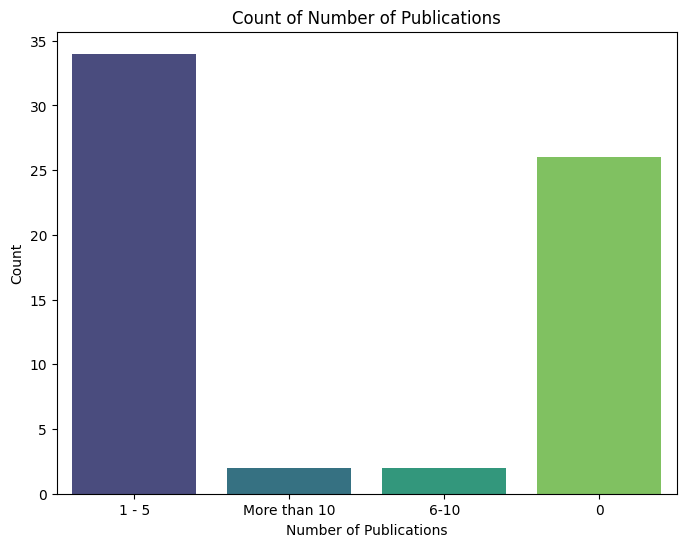

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Number of publications', palette='viridis')

plt.title('Count of Number of Publications')
plt.xlabel('Number of Publications')
plt.ylabel('Count')

plt.show()

In [14]:
data['Number of publications'].unique()

array(['1 - 5', 'More than 10', '6-10', '0'], dtype=object)

## Now we will deal with 'Fields of research interest ' column

>This column has 2 Null Values, First We will deal with these

> As this data has a lot of unique values we are going to conduct One-Hot Encoding in the feature engineering


In [15]:
print(data[data['Fields of research interest'].isnull()].index)
data['Fields of research interest'].fillna('Not interested in Research', inplace=True)
print(data[data['Fields of research interest'].isnull()].index)

Index([10, 11], dtype='int64')
Index([], dtype='int64')


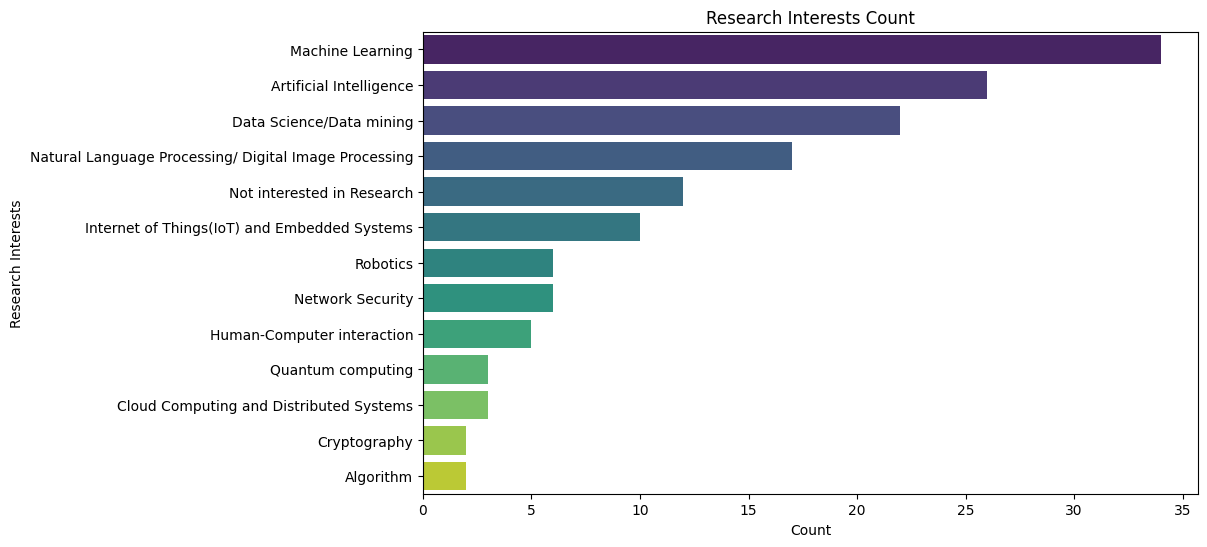

In [16]:
interests = data['Fields of research interest'].str.split(', ').explode()

plt.figure(figsize=(10, 6))
sns.countplot(y=interests, order=interests.value_counts().index, palette='viridis')
plt.title('Research Interests Count')
plt.xlabel('Count')
plt.ylabel('Research Interests')

plt.show()

### Now dealing with 'What was the name of the company you worked for right after your graduation? if your answer is not write N/A.' column

#### But we will drop this column because it has a lot of different values and the column is not actually needed in our prediction model

In [17]:
print(data['What was the name of the company you worked for right after your graduation? if your answer is not write N/A.'].isnull().sum())
data['What was the name of the company you worked for right after your graduation? if your answer is not write N/A.'].fillna('N/A', inplace=True)
print(data['What was the name of the company you worked for right after your graduation? if your answer is not write N/A.'].isnull().sum())

25
0


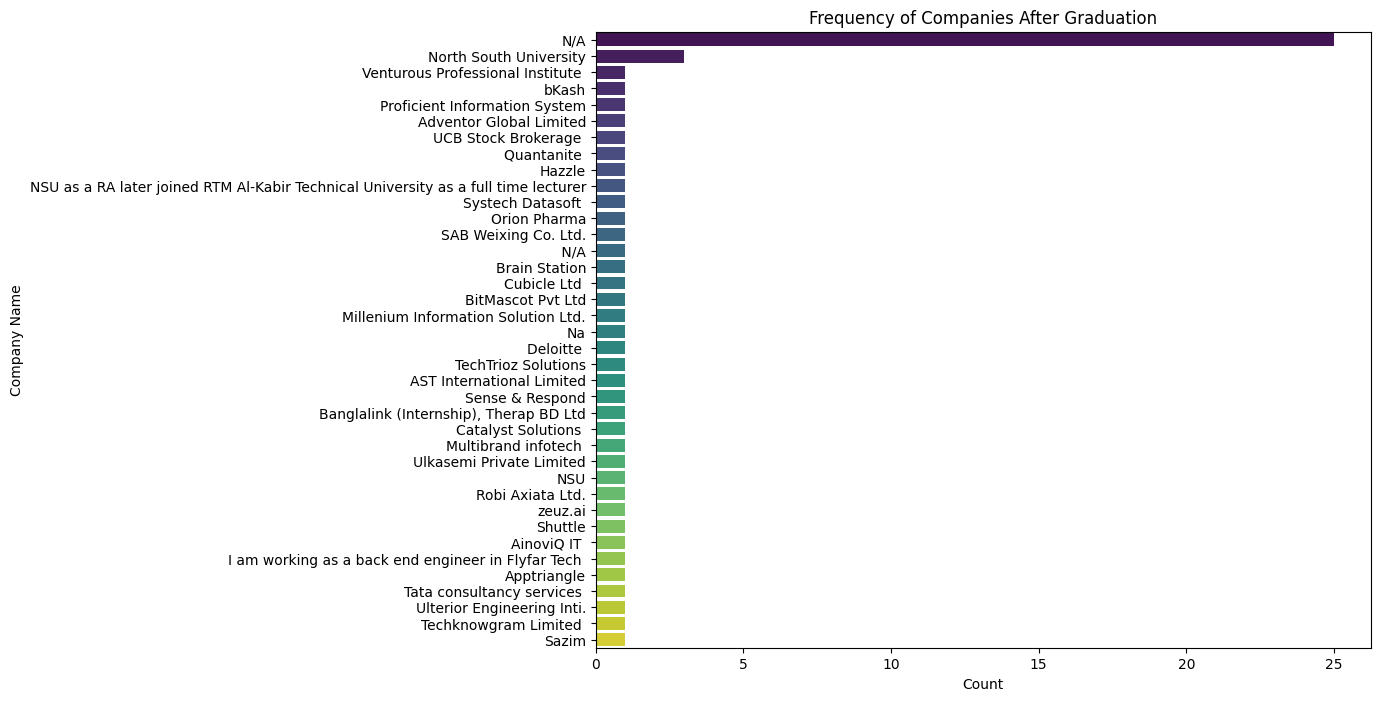

In [18]:
plt.figure(figsize=(10, 8))
sns.countplot(y='What was the name of the company you worked for right after your graduation? if your answer is not write N/A.', data=data, palette='viridis', 
              order=data['What was the name of the company you worked for right after your graduation? if your answer is not write N/A.'].value_counts().index)
plt.title('Frequency of Companies After Graduation')
plt.xlabel('Count')
plt.ylabel('Company Name')

plt.show()

## Now 'What was your starting salary range?' Column

In [19]:
print(data['What was your starting salary range?'].unique())
data['What was your starting salary range?'].fillna('N/A', inplace=True)
print(data['What was your starting salary range?'].unique())

['BDT 15K - 25K' '> 25K - 40K' '> 40K' nan]
['BDT 15K - 25K' '> 25K - 40K' '> 40K' 'N/A']


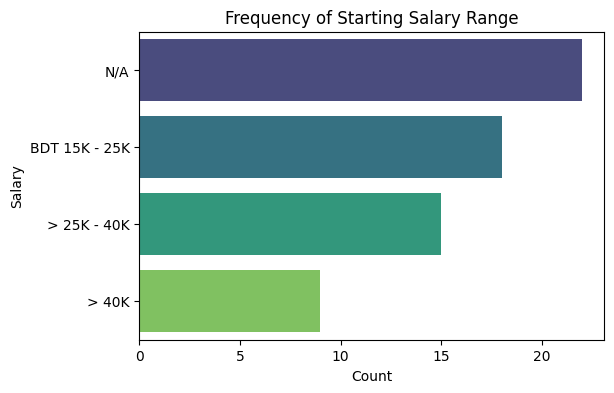

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(y='What was your starting salary range?', data=data, palette='viridis', 
              order=data['What was your starting salary range?'].value_counts().index)
plt.title('Frequency of Starting Salary Range')
plt.xlabel('Count')
plt.ylabel('Salary')

plt.show()

### Now Dealing with 'What was the name of the University you completed your higher studies from? if answer is no write N/A.'
#### 1. First we are going to remove the null values
#### 2. Then We are going to replace the Na with N/A
#### 3. Then we are going to visualize it

In [21]:
print("Null Values : ",data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].isnull().sum())

print("\n\nWhat was the name of the University you completed your higher studies from? if answer is no write N/A.\n\n",data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].unique())

Null Values :  50


What was the name of the University you completed your higher studies from? if answer is no write N/A.

 ['Florida Atlantic University' 'University of Wisconsin-Milwaukee'
 'Marquette University ' 'University of Jena (Abbe School of Photonics)'
 nan 'Memorial University ' 'U of Rochester '
 'University of British Columbia'
 'Darmstadt University of Applied Sciences' 'North south univeristy'
 'University of Hertfordshire' 'Ryerson university '
 'North South University' 'Concordia University ' 'Na']


In [22]:
data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].fillna('N/A', inplace=True)
data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].replace('Na', 'N/A', inplace=True)
data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].unique()

array(['Florida Atlantic University', 'University of Wisconsin-Milwaukee',
       'Marquette University ',
       'University of Jena (Abbe School of Photonics)', 'N/A',
       'Memorial University ', 'U of Rochester ',
       'University of British Columbia',
       'Darmstadt University of Applied Sciences',
       'North south univeristy', 'University of Hertfordshire',
       'Ryerson university ', 'North South University',
       'Concordia University '], dtype=object)

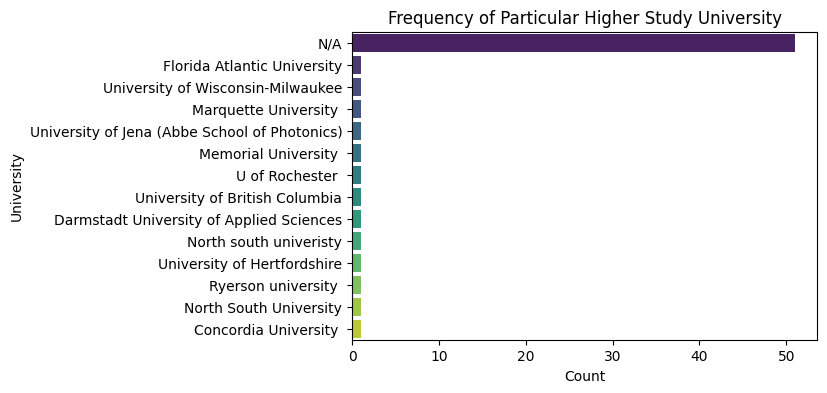

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(y='What was the name of the University you completed your higher studies from? if answer is no write N/A.', data=data, palette='viridis', 
              order=data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].value_counts().index)
plt.title('Frequency of Particular Higher Study University')
plt.xlabel('Count')
plt.ylabel('University')

plt.show()

## Now for the 'Which country did you go to for higher studies? ' Column
#### 1. We will just replace the 1 nan value with 'Not yet started'
#### 2. Then we will visualize it

['United States of America (USA)' 'Germany' 'Not yet started' 'Canada'
 'United Kingdom' 'Australia' 'Other' nan]


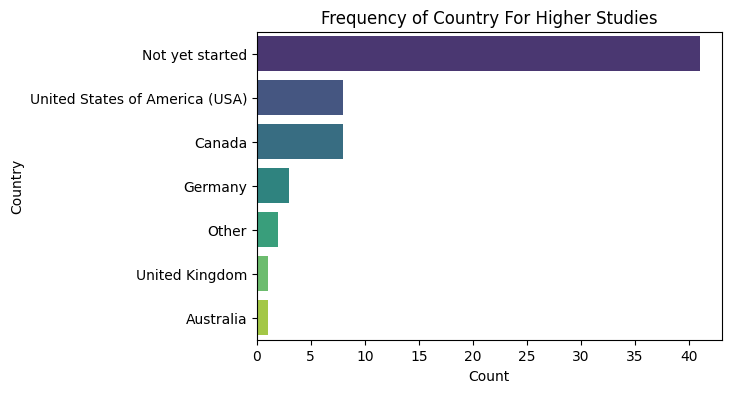

In [24]:
print(data['Which country did you go to for higher studies?'].unique())

data['Which country did you go to for higher studies?'].replace('N/A', 'Not yet started', inplace=True)
data['Which country did you go to for higher studies?'].fillna("Not yet started",inplace=True)

plt.figure(figsize=(6, 4))
sns.countplot(y='Which country did you go to for higher studies?', data=data, palette='viridis', 
              order=data['Which country did you go to for higher studies?'].value_counts().index)
plt.title('Frequency of Country For Higher Studies')
plt.xlabel('Count')
plt.ylabel('Country')

plt.show()

## Now for the 'Where did you start working after completing your higher studies?' Column
### 1. We will just replace the nan value with 'Not Working'
### 2. Then We will visualize it

['Industry' nan 'Educational institute']


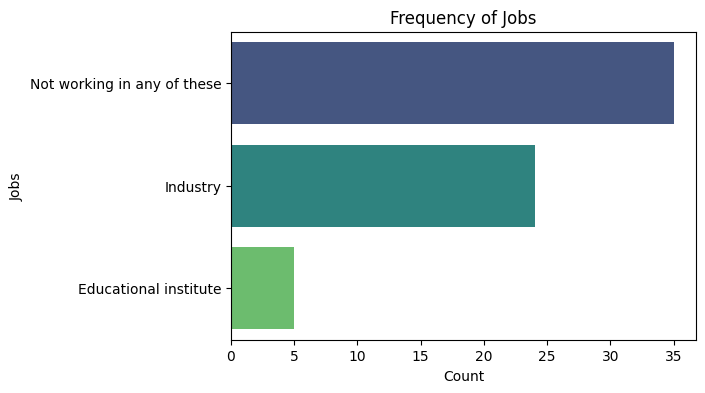

In [25]:
print(data['Where did you start working after completing your higher studies?'].unique())

data['Where did you start working after completing your higher studies?'].fillna('Not working in any of these', inplace=True)

plt.figure(figsize=(6, 4))
sns.countplot(y='Where did you start working after completing your higher studies?', data=data, palette='viridis', 
              order=data['Where did you start working after completing your higher studies?'].value_counts().index)
plt.title('Frequency of Jobs')
plt.xlabel('Count')
plt.ylabel('Jobs')

plt.show()

In [26]:
data.isnull().sum()

Timestamp                                                                                                        0
Email Address                                                                                                    0
Gender                                                                                                           0
Cumulative Grade Point Average(CGPA)                                                                             0
Total year now since your graduation                                                                             0
Fields of research interest                                                                                      0
Number of publications                                                                                           0
Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?                            0
Did you participate in any extra curricular activities while you were studying i

## We have succesfully removed all the Null Values/Wrong Data/Duplicate Data
### Now we will drop the Timestamp and Email Address from our dataset because We do not need these columns

In [27]:
data.drop("Timestamp", axis=1, inplace=True)
data.drop("Email Address", axis=1, inplace=True)

# Column Investigation for Wrong Data
## We will go Column by Column

### Starting with the column : Total year now since your graduation
> We can see we have a lot of garbage inputs and we are gonna manipulate the data with proper values according to those garbage wrong values

In [28]:
data['Total year now since your graduation'].unique()

array(['1', '4', '3', '8', '0', '2', '6', '5', 'one', '1.5', '3.5',
       'almost 5 years', '4.5 years', '1 year', '2.5 years', '8 Months',
       '0.5 year ', '5 years ', 'aprox 1 year', '0.5', '1 year ',
       '2 months', '7 months. ', '1 Year', '2 Month', 'less than 1 year',
       '0.2'], dtype=object)

In [29]:
data['Total year now since your graduation'].replace('8 Months', 'less than 1 year', inplace=True)
data['Total year now since your graduation'].replace('0.5 year ', 'less than 1 year', inplace=True)
data['Total year now since your graduation'].replace('0.5', 'less than 1 year', inplace=True)
data['Total year now since your graduation'].replace('2 months', 'less than 1 year', inplace=True)
data['Total year now since your graduation'].replace('7 months. ', 'less than 1 year', inplace=True)
data['Total year now since your graduation'].replace('2 Month', 'less than 1 year', inplace=True)
data['Total year now since your graduation'].replace('0.2', 'less than 1 year', inplace=True)

data['Total year now since your graduation'].replace('one', '1', inplace=True)
data['Total year now since your graduation'].replace('1 year', '1', inplace=True)
data['Total year now since your graduation'].replace('1 year ', '', inplace=True)


data['Total year now since your graduation'].replace('less than 1 year', '0', inplace=True)
data['Total year now since your graduation'].replace('almost 5 years', '5', inplace=True)


data['Total year now since your graduation'].replace('4.5 years', '4', inplace=True)
data['Total year now since your graduation'].replace('2.5 years', '2', inplace=True)

data['Total year now since your graduation'].replace('5 years ', '5', inplace=True)
data['Total year now since your graduation'].replace('aprox 1 year', '1', inplace=True)
data['Total year now since your graduation'].replace('1 Year', '1', inplace=True)

data['Total year now since your graduation'].replace('1.5', '1', inplace=True)
data['Total year now since your graduation'].replace('3.5', '3', inplace=True)
data['Total year now since your graduation'].replace('', '0', inplace=True)

In [30]:
data['Total year now since your graduation'].isnull().sum()

0

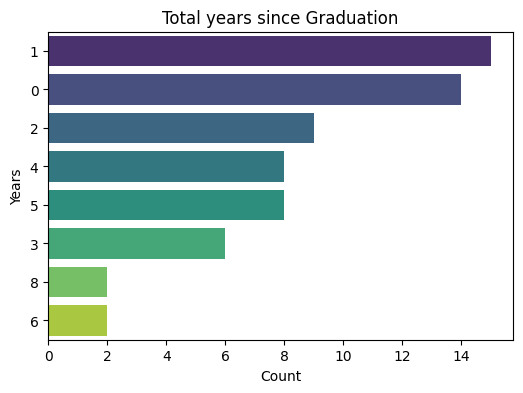

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(y='Total year now since your graduation', data=data, palette='viridis', 
              order=data['Total year now since your graduation'].value_counts().index)
plt.title('Total years since Graduation')
plt.xlabel('Count')
plt.ylabel('Years')

plt.show()

In [32]:
data.columns

Index(['Gender', 'Cumulative Grade Point Average(CGPA)',
       'Total year now since your graduation', 'Fields of research interest',
       'Number of publications',
       'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?',
       'Did you participate in any extra curricular activities while you were studying in NSU?',
       'Were you interested in coding?',
       'Did you participate in any competitive programming?',
       'Programming languages you know', 'Frameworks you know',
       'Did you start working as a software engineer after graduation?',
       'What was the name of the company you worked for right after your graduation? if your answer is not write N/A.',
       'What was your starting salary range?',
       'Did you have any Start-ups after graduation?',
       'Which country did you go to for higher studies?',
       'What was the name of the University you completed your higher studies from? if answer is no write N/A.',
      

## Question 4. Organize the data into a JSON file and then read this JSON data.


In [33]:
data.to_json('DatasetJson.json')

In [34]:
read_data = pd.read_json('DatasetJson.json')
read_data.head(5)

,Gender,Cumulative Grade Point Average(CGPA),Total year now since your graduation,Fields of research interest,Number of publications,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Programming languages you know,Frameworks you know,Did you start working as a software engineer after graduation?,What was the name of the company you worked for right after your graduation? if your answer is not write N/A.,What was your starting salary range?,Did you have any Start-ups after graduation?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.,Where did you start working after completing your higher studies?
1,Male,3 to < 3.5,1,"Internet of Things(IoT) and Embedded Systems, ...",1 - 5,No,Yes,Yes,Yes,"C, C++, HTML",Not interested,No,Venturous Professional Institute,BDT 15K - 25K,No,United States of America (USA),Florida Atlantic University,Industry
2,Male,3.5 to 4,4,"Machine Learning, Artificial Intelligence, Nat...",More than 10,Yes,Yes,Yes,Yes,"C, Java, Python, C++, R",Laravel,No,AST International Limited,> 25K - 40K,No,United States of America (USA),University of Wisconsin-Milwaukee,Not working in any of these
3,Female,3.5 to 4,3,Human-Computer interaction,1 - 5,Yes,Yes,Yes,Yes,"C, Python, PHP, C++, HTML, CSS, JavaScript, R,...","React, Django, Laravel, Node.js",Yes,"Banglalink (Internship), Therap BD Ltd",> 40K,No,United States of America (USA),Marquette University,Not working in any of these
4,Male,3.5 to 4,8,"Machine Learning, Data Science/Data mining, Ar...",6-10,Yes,Yes,Yes,No,"C, Python, R, SQL",Django,No,North South University,BDT 15K - 25K,No,Germany,University of Jena (Abbe School of Photonics),Educational institute
5,Female,3.5 to 4,0,"Machine Learning, Data Science/Data mining, Ar...",1 - 5,No,No,No,No,"C, HTML, CSS, SQL",jQuery,No,Catalyst Solutions,BDT 15K - 25K,No,Not yet started,N/A,Not working in any of these


## Visualize the Dataset [An Overview of the distribution of Data]

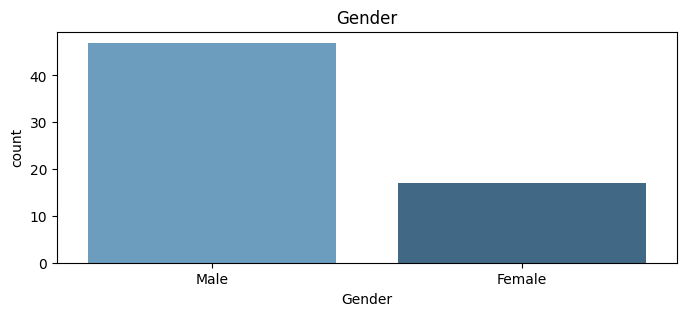

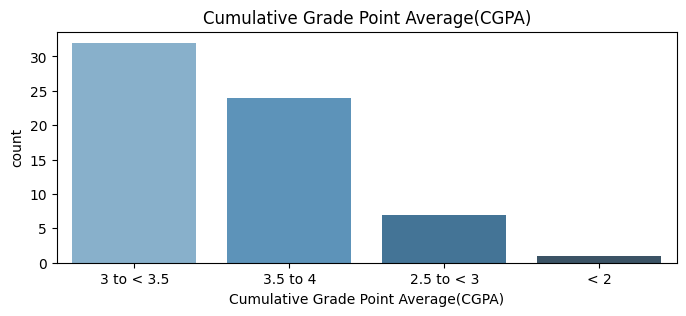

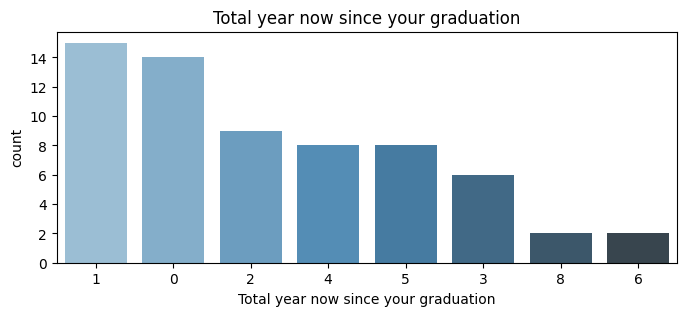

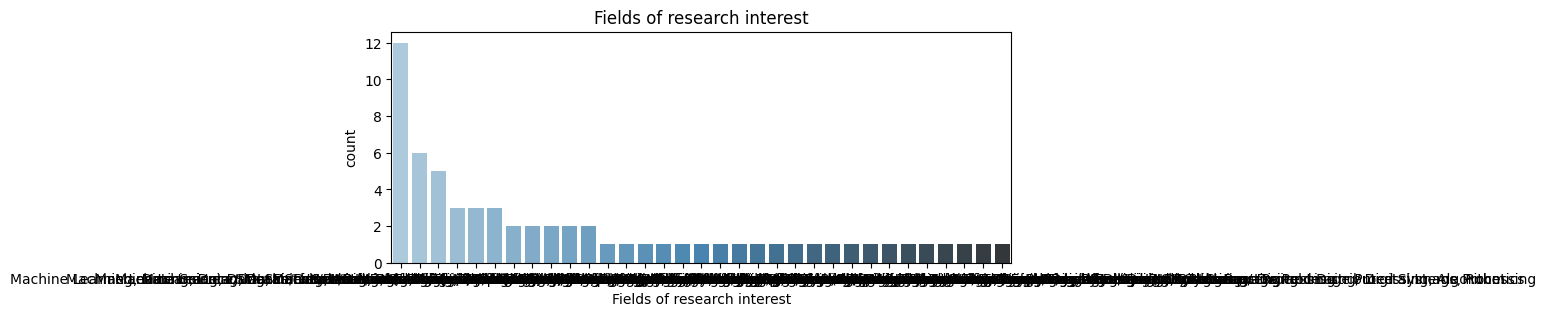

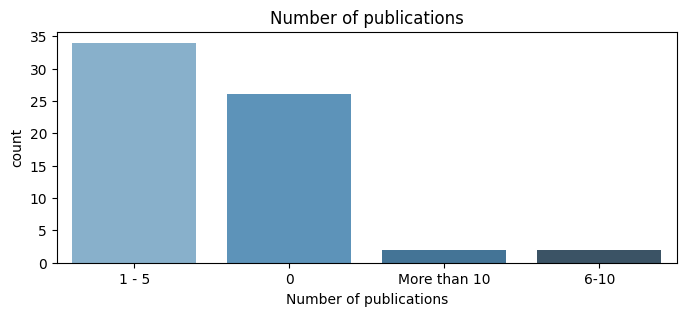

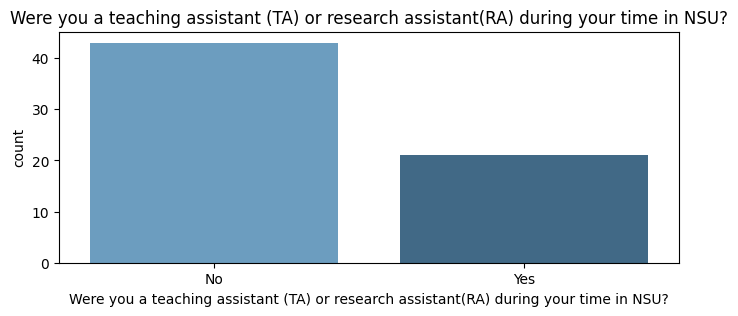

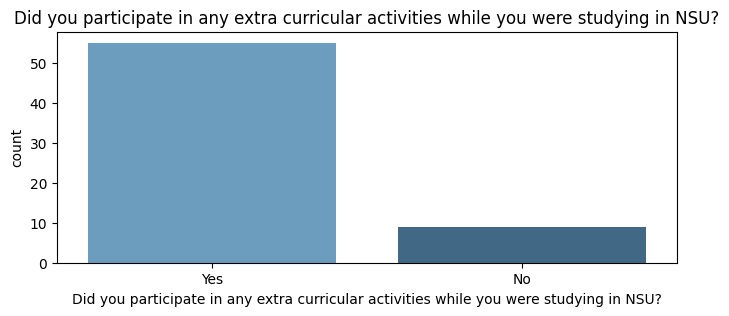

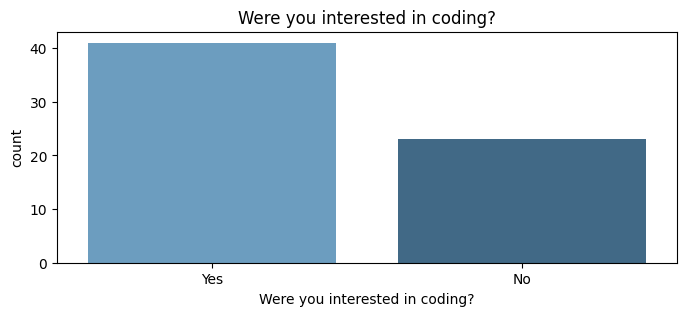

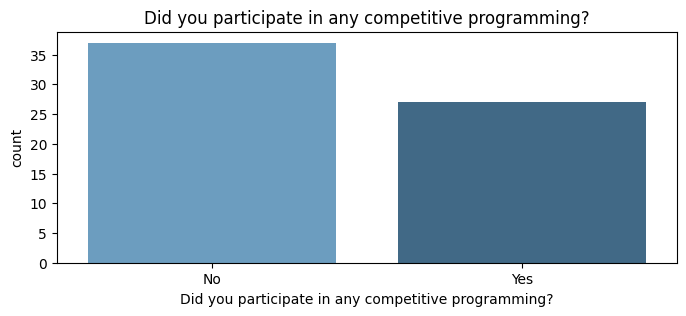

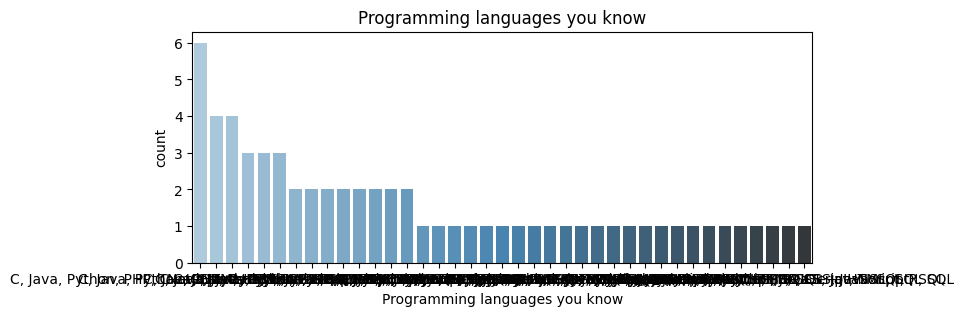

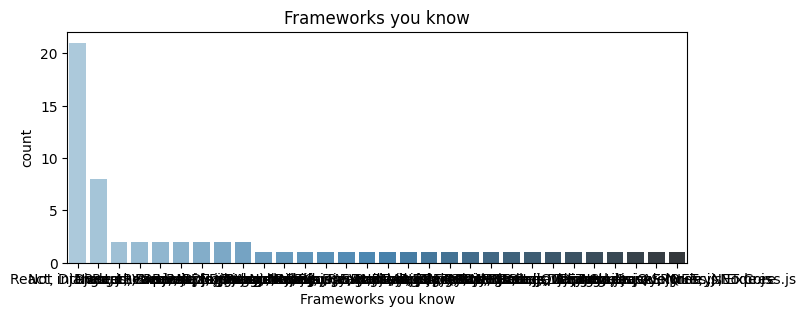

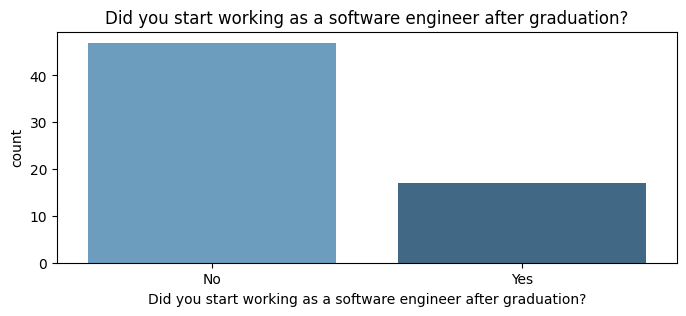

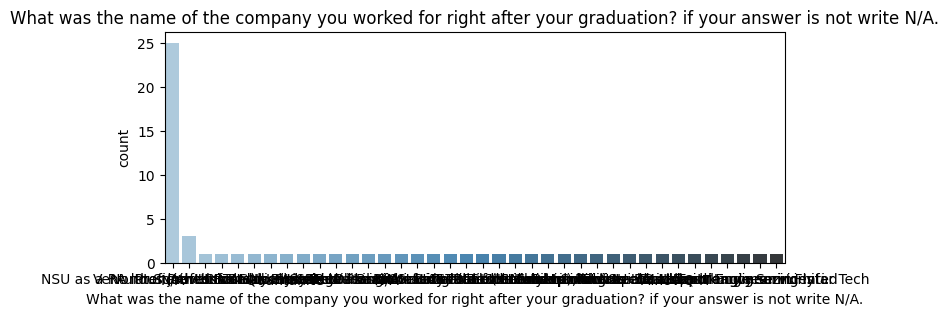

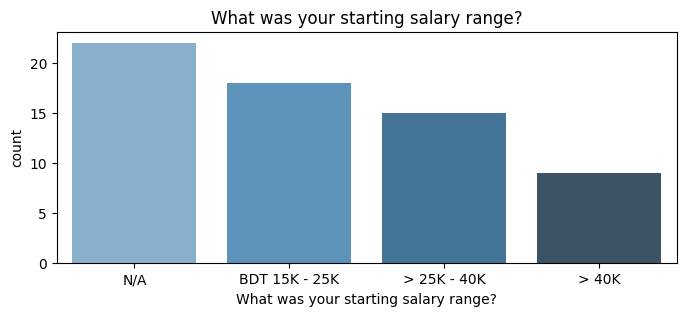

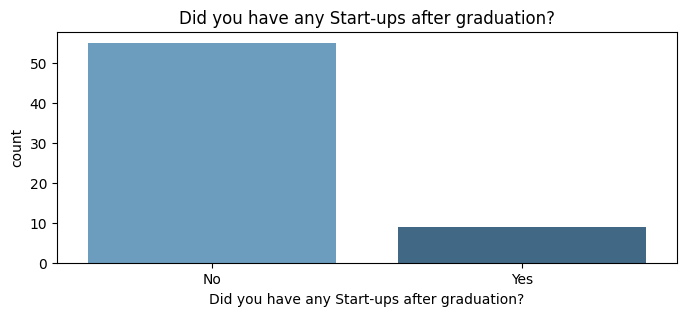

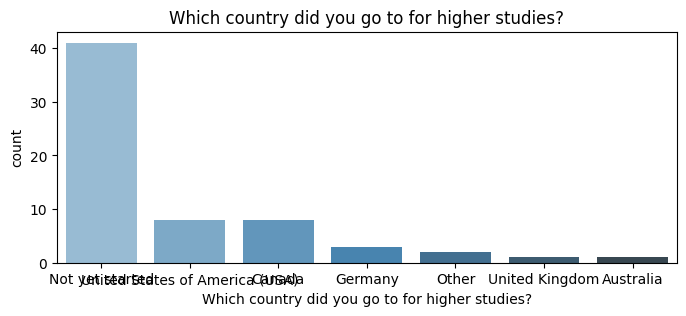

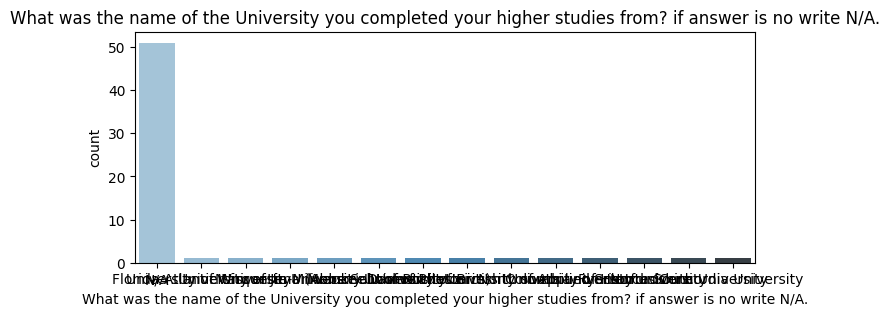

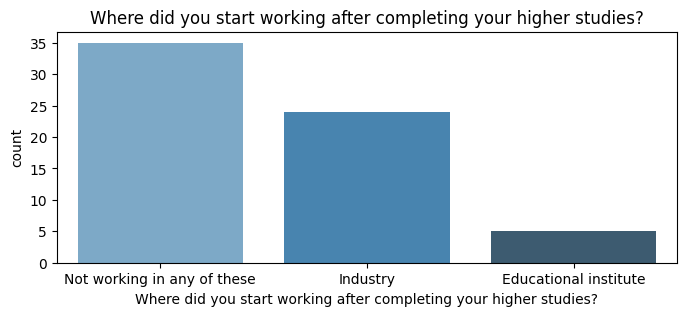

In [35]:
for i in data.columns:
    plt.figure(figsize=(8, 3))
    sns.barplot(x=data[i].value_counts().index, y=data[i].value_counts(), palette="Blues_d")
    plt.title(i)
    plt.show()

# Question 5 :  Do you think scaling is necessary in this case? Justify
## Answer: Yes Scaling is indeed needed because our dataset has only Categorical values, So we need to convert them to Numerical Values
# Scaling/Encoding [Categorical Values --> Numerical Values]
>We can see our dataset has a lot of categorical values, We need to convert them to Numerical values in order to show the Correlation betweet the features
# So Scaling the data is really needed
## We will do 4 types of Scaling/Encoding
1. Binary Label Encoding {For features that has yes/no or male/female values}
2. Ordinal Encoding {For Features that has values that maintains an order}
3. One Hot Encoding {For Features that has Multiple Choice options}
4. Nominal Encoding {For Features that maybe the Dependable Feature or The Target Value}

## We will Do Binary Label Encoding for these columns
>Because These columns have either yes or no Values

In [36]:
print(f"Gender Column Values : {data['Gender'].unique()}\n")
print(f"Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU? Column Values : {data['Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?'].unique()}\n")
print(f"Did you participate in any extra curricular activities while you were studying in NSU? Column Values : {data['Did you participate in any extra curricular activities while you were studying in NSU?'].unique()}\n")
print(f"Were you interested in coding? Column Values : {data['Were you interested in coding?'].unique()}\n")
print(f"Did you participate in any competitive programming? Column Values : {data['Did you participate in any competitive programming?'].unique()}\n")
print(f"Did you start working as a software engineer after graduation? Column Values : {data['Did you start working as a software engineer after graduation?'].unique()}\n")
print(f"Did you have any Start-ups after graduation? Column Values : {data['Did you have any Start-ups after graduation?'].unique()}\n")

Gender Column Values : ['Male' 'Female']

Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU? Column Values : ['No' 'Yes']

Did you participate in any extra curricular activities while you were studying in NSU? Column Values : ['Yes' 'No']

Were you interested in coding? Column Values : ['Yes' 'No']

Did you participate in any competitive programming? Column Values : ['Yes' 'No']

Did you start working as a software engineer after graduation? Column Values : ['No' 'Yes']

Did you have any Start-ups after graduation? Column Values : ['No' 'Yes']



In [37]:
data.head(5)

,Gender,Cumulative Grade Point Average(CGPA),Total year now since your graduation,Fields of research interest,Number of publications,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Programming languages you know,Frameworks you know,Did you start working as a software engineer after graduation?,What was the name of the company you worked for right after your graduation? if your answer is not write N/A.,What was your starting salary range?,Did you have any Start-ups after graduation?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.,Where did you start working after completing your higher studies?
1,Male,3 to < 3.5,1,"Internet of Things(IoT) and Embedded Systems, ...",1 - 5,No,Yes,Yes,Yes,"C, C++, HTML",Not interested,No,Venturous Professional Institute,BDT 15K - 25K,No,United States of America (USA),Florida Atlantic University,Industry
2,Male,3.5 to 4,4,"Machine Learning, Artificial Intelligence, Nat...",More than 10,Yes,Yes,Yes,Yes,"C, Java, Python, C++, R",Laravel,No,AST International Limited,> 25K - 40K,No,United States of America (USA),University of Wisconsin-Milwaukee,Not working in any of these
3,Female,3.5 to 4,3,Human-Computer interaction,1 - 5,Yes,Yes,Yes,Yes,"C, Python, PHP, C++, HTML, CSS, JavaScript, R,...","React, Django, Laravel, Node.js",Yes,"Banglalink (Internship), Therap BD Ltd",> 40K,No,United States of America (USA),Marquette University,Not working in any of these
4,Male,3.5 to 4,8,"Machine Learning, Data Science/Data mining, Ar...",6-10,Yes,Yes,Yes,No,"C, Python, R, SQL",Django,No,North South University,BDT 15K - 25K,No,Germany,University of Jena (Abbe School of Photonics),Educational institute
5,Female,3.5 to 4,0,"Machine Learning, Data Science/Data mining, Ar...",1 - 5,No,No,No,No,"C, HTML, CSS, SQL",jQuery,No,Catalyst Solutions,BDT 15K - 25K,No,Not yet started,N/A,Not working in any of these


In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = [
    'Gender',
    'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?',
    'Did you participate in any extra curricular activities while you were studying in NSU?',
    'Were you interested in coding?',
    'Did you participate in any competitive programming?',
    'Did you start working as a software engineer after graduation?',
    'Did you have any Start-ups after graduation?',
    
]
encoded_binary = data[columns_to_encode]
for column in columns_to_encode:
    encoded_binary[column] = label_encoder.fit_transform(encoded_binary[column])
encoded_binary

C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\1078086232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_binary[column] = label_encoder.fit_transform(encoded_binary[column])
C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\1078086232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_binary[column] = label_encoder.fit_transform(encoded_binary[column])
C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\1078086232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Gender,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Did you start working as a software engineer after graduation?,Did you have any Start-ups after graduation?
1,1,0,1,1,1,0,0
2,1,1,1,1,1,0,0
3,0,1,1,1,1,1,0
4,1,1,1,1,0,0,0
5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
60,1,0,0,0,0,0,0
61,1,0,1,1,1,1,0
62,1,1,0,1,1,1,0
63,1,1,1,1,0,1,0


## We will do Ordinal Encoding for these columns
> Because the data of these columns maintains a sort of order

In [39]:
print(f"Cumulative Grade Point Average(CGPA) column Values : {data['Cumulative Grade Point Average(CGPA)'].unique()}\n")
print(f"Number of publications column Values : {data['Number of publications'].unique()}\n")
print(f"What was your starting salary range? Column Values : {data['What was your starting salary range?'].unique()}\n")

Cumulative Grade Point Average(CGPA) column Values : ['3 to < 3.5' '3.5 to 4' '2.5 to < 3' '< 2']

Number of publications column Values : ['1 - 5' 'More than 10' '6-10' '0']

What was your starting salary range? Column Values : ['BDT 15K - 25K' '> 25K - 40K' '> 40K' 'N/A']



In [40]:
columns_to_encode = [
    'Cumulative Grade Point Average(CGPA)',
    'Number of publications',
    'What was your starting salary range?'
]
encoded_ordinal = data[columns_to_encode]
encoded_ordinal.head(5)

,Cumulative Grade Point Average(CGPA),Number of publications,What was your starting salary range?
1,3 to < 3.5,1 - 5,BDT 15K - 25K
2,3.5 to 4,More than 10,> 25K - 40K
3,3.5 to 4,1 - 5,> 40K
4,3.5 to 4,6-10,BDT 15K - 25K
5,3.5 to 4,1 - 5,BDT 15K - 25K


In [41]:
data['Number of publications'].unique()

array(['1 - 5', 'More than 10', '6-10', '0'], dtype=object)

In [42]:
cgpa_rank_mapping = {
    '3.5 to 4': 3,
    '3 to < 3.5': 2,
    '2.5 to < 3': 1,
    '< 2': 0
}
encoded_ordinal['Cumulative Grade Point Average(CGPA)'] = encoded_ordinal['Cumulative Grade Point Average(CGPA)'].map(cgpa_rank_mapping)

C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\1535697869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_ordinal['Cumulative Grade Point Average(CGPA)'] = encoded_ordinal['Cumulative Grade Point Average(CGPA)'].map(cgpa_rank_mapping)


In [43]:
publication_mapping = {
    'More than 10': 3,
    '6-10': 2,
    '1 - 5': 1,
    '0': 0
}
encoded_ordinal['Number of publications'] = encoded_ordinal['Number of publications'].map(publication_mapping)

C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\2042818071.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_ordinal['Number of publications'] = encoded_ordinal['Number of publications'].map(publication_mapping)


In [44]:
salary_mapping = {
    '> 40K': 3,
    '> 25K - 40K': 2,
    'BDT 15K - 25K': 1,
    'N/A': 0
}
encoded_ordinal['What was your starting salary range?'] = encoded_ordinal['What was your starting salary range?'].map(salary_mapping)

C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\1304109159.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_ordinal['What was your starting salary range?'] = encoded_ordinal['What was your starting salary range?'].map(salary_mapping)


In [45]:
encoded_ordinal.head(5)

,Cumulative Grade Point Average(CGPA),Number of publications,What was your starting salary range?
1,2,1,1
2,3,3,2
3,3,1,3
4,3,2,1
5,3,1,1


In [46]:
encoded_ordinal.isnull().sum()

Cumulative Grade Point Average(CGPA)    0
Number of publications                  0
What was your starting salary range?    0
dtype: int64

In [47]:
encoded_ordinal['Number of publications'].unique()

array([1, 3, 2, 0], dtype=int64)

### For 'Programming languages you know', 'Frameworks you know' and 'Fields of research interest' We will do One Hot Encoding

In [48]:
print(f"Programming languages you know column Values : {data['Programming languages you know'].unique()}\n")
print(f"Frameworks you know column Values : {data['Frameworks you know'].unique()}\n")
print(f"Fields of research interest column Values : {data['Fields of research interest'].unique()}\n")


Programming languages you know column Values : ['C, C++, HTML' 'C, Java, Python, C++, R'
 'C, Python, PHP, C++, HTML, CSS, JavaScript, R, SQL, NoSQL'
 'C, Python, R, SQL' 'C, HTML, CSS, SQL' 'C, Java, Python'
 'C, Java, C++, HTML, CSS, JavaScript, SQL' 'C, Python, HTML'
 'C, Python, HTML, CSS, SQL' 'Python' 'C' 'C, Python'
 'C, Python, HTML, CSS, JavaScript, SQL, NoSQL' 'C, Python, SQL'
 'C, Java, Python, PHP, C++, HTML, SQL'
 'C, Java, Python, C++, HTML, CSS, JavaScript, R, SQL' 'C, Python, C++'
 'C, Java, Python, PHP, C++, HTML, CSS, JavaScript, SQL, NoSQL'
 'C, Java, Python, PHP, HTML, CSS, JavaScript, NoSQL'
 'C, Java, Python, PHP, C++, HTML, CSS, JavaScript, SQL'
 'C, Java, Python, PHP, HTML, CSS, SQL'
 'C, Java, Python, C++, JavaScript, SQL' 'C, Java, Python, C++, SQL' 'SQL'
 'Not interested' 'C, Java, C++, HTML, CSS, SQL'
 'C, Python, HTML, CSS, JavaScript' 'Java, Python, HTML, JavaScript'
 'C, Java, C++, HTML, CSS, JavaScript'
 'C, Java, Python, PHP, HTML, CSS, JavaScript, SQL'

## Performing One Hot Encoding
>It takes the multiple choice answers from the user and based on the answers we will create new columns for each of the options ticked and mark as yes or no(1 or 0) for those options/columns 

In [49]:
df_PL_encoded = data['Programming languages you know'].str.get_dummies(', ')
print(f"Programming languages you know dataframe Columns: {df_PL_encoded.columns}\nColumn Length : {len(df_PL_encoded.columns)}\n")
df_PL_encoded.head(15)


Programming languages you know dataframe Columns: Index(['C', 'C++', 'CSS', 'HTML', 'Java', 'JavaScript', 'NoSQL',
       'Not interested', 'PHP', 'Python', 'R', 'SQL'],
      dtype='object')
Column Length : 12



,C,C++,CSS,HTML,Java,JavaScript,NoSQL,Not interested,PHP,Python,R,SQL
1,1,1,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,1,1,0
3,1,1,1,1,0,1,1,0,1,1,1,1
4,1,0,0,0,0,0,0,0,0,1,1,1
5,1,0,1,1,0,0,0,0,0,0,0,1
6,1,0,0,0,1,0,0,0,0,1,0,0
7,1,1,1,1,1,1,0,0,0,0,0,1
8,1,0,0,1,0,0,0,0,0,1,0,0
9,1,0,1,1,0,0,0,0,0,1,0,1
10,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
df_FoR_encoded = data['Fields of research interest'].str.get_dummies(', ')
print(f"Fields of research interest dataframe Columns: {df_FoR_encoded.columns}\n\nColumn Length : {len(df_FoR_encoded.columns)}\n")
df_FoR_encoded.head(15)

Fields of research interest dataframe Columns: Index(['Algorithm', 'Artificial Intelligence',
       'Cloud Computing and Distributed Systems', 'Cryptography',
       'Data Science/Data mining', 'Human-Computer interaction',
       'Internet of Things(IoT) and Embedded Systems', 'Machine Learning',
       'Natural Language Processing/ Digital Image Processing',
       'Network Security', 'Not interested in Research', 'Quantum computing',
       'Robotics'],
      dtype='object')

Column Length : 13



,Algorithm,Artificial Intelligence,Cloud Computing and Distributed Systems,Cryptography,Data Science/Data mining,Human-Computer interaction,Internet of Things(IoT) and Embedded Systems,Machine Learning,Natural Language Processing/ Digital Image Processing,Network Security,Not interested in Research,Quantum computing,Robotics
1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,1,0,0,0,0
5,0,1,0,0,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,0,0,0
7,0,1,0,0,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
df_FW_encoded = data['Frameworks you know'].str.get_dummies(', ')
print(f"Frameworks you know dataframe Columns: {df_FW_encoded.columns}\n\nColumn Length : {len(df_FW_encoded.columns)}\n")
df_FW_encoded.head(15)

Frameworks you know dataframe Columns: Index(['.NET Core', 'ASP.NET', 'Angular', 'Django', 'Express.js', 'Laravel',
       'Node.js', 'Not interested', 'React', 'Ruby on Rails', 'Vue.js',
       'jQuery'],
      dtype='object')

Column Length : 12



,.NET Core,ASP.NET,Angular,Django,Express.js,Laravel,Node.js,Not interested,React,Ruby on Rails,Vue.js,jQuery
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,1,1,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,1,1,0,1,0,0,1
10,0,0,0,0,0,0,0,1,0,0,0,0


## We will be removing the columns which has a lot of different data and the columns that are not important  

In [52]:
# data['What was the name of the company you worked for right after your graduation? if your answer is not write N/A.'].unique()

In [53]:
# data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].unique()

# Nominal Encoding

In [54]:
print(f"Where did you start working after completing your higher studies? Column Values : {data['Where did you start working after completing your higher studies?'].unique()}\n")
print(f"Which country did you go to for higher studies? Column Values : {data['Which country did you go to for higher studies?'].unique()}\n")
print(f"'What was the name of the University you completed your higher studies from? if answer is no write N/A.' Column Values : {data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].unique()}")


Where did you start working after completing your higher studies? Column Values : ['Industry' 'Not working in any of these' 'Educational institute']

Which country did you go to for higher studies? Column Values : ['United States of America (USA)' 'Germany' 'Not yet started' 'Canada'
 'United Kingdom' 'Australia' 'Other']

'What was the name of the University you completed your higher studies from? if answer is no write N/A.' Column Values : ['Florida Atlantic University' 'University of Wisconsin-Milwaukee'
 'Marquette University ' 'University of Jena (Abbe School of Photonics)'
 'N/A' 'Memorial University ' 'U of Rochester '
 'University of British Columbia'
 'Darmstadt University of Applied Sciences' 'North south univeristy'
 'University of Hertfordshire' 'Ryerson university '
 'North South University' 'Concordia University ']


In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = [
    'Where did you start working after completing your higher studies?',
    'Which country did you go to for higher studies?',
    'What was the name of the University you completed your higher studies from? if answer is no write N/A.'
]
encoded_Dependable = data[columns_to_encode]
for column in columns_to_encode:
    encoded_Dependable[column] = label_encoder.fit_transform(encoded_Dependable[column])
encoded_Dependable

C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\3544060623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_Dependable[column] = label_encoder.fit_transform(encoded_Dependable[column])
C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\3544060623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_Dependable[column] = label_encoder.fit_transform(encoded_Dependable[column])
C:\Users\nahia\AppData\Local\Temp\ipykernel_12048\3544060623.py:10: SettingWithCopyWarning: 
A value is trying to 

,Where did you start working after completing your higher studies?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.
1,1,6,2
2,2,6,13
3,2,6,3
4,0,2,12
5,2,3,5
...,...,...,...
60,1,3,5
61,1,3,5
62,0,1,5
63,2,3,5


In [56]:
data

,Gender,Cumulative Grade Point Average(CGPA),Total year now since your graduation,Fields of research interest,Number of publications,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Programming languages you know,Frameworks you know,Did you start working as a software engineer after graduation?,What was the name of the company you worked for right after your graduation? if your answer is not write N/A.,What was your starting salary range?,Did you have any Start-ups after graduation?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.,Where did you start working after completing your higher studies?
1,Male,3 to < 3.5,1,"Internet of Things(IoT) and Embedded Systems, ...",1 - 5,No,Yes,Yes,Yes,"C, C++, HTML",Not interested,No,Venturous Professional Institute,BDT 15K - 25K,No,United States of America (USA),Florida Atlantic University,Industry
2,Male,3.5 to 4,4,"Machine Learning, Artificial Intelligence, Nat...",More than 10,Yes,Yes,Yes,Yes,"C, Java, Python, C++, R",Laravel,No,AST International Limited,> 25K - 40K,No,United States of America (USA),University of Wisconsin-Milwaukee,Not working in any of these
3,Female,3.5 to 4,3,Human-Computer interaction,1 - 5,Yes,Yes,Yes,Yes,"C, Python, PHP, C++, HTML, CSS, JavaScript, R,...","React, Django, Laravel, Node.js",Yes,"Banglalink (Internship), Therap BD Ltd",> 40K,No,United States of America (USA),Marquette University,Not working in any of these
4,Male,3.5 to 4,8,"Machine Learning, Data Science/Data mining, Ar...",6-10,Yes,Yes,Yes,No,"C, Python, R, SQL",Django,No,North South University,BDT 15K - 25K,No,Germany,University of Jena (Abbe School of Photonics),Educational institute
5,Female,3.5 to 4,0,"Machine Learning, Data Science/Data mining, Ar...",1 - 5,No,No,No,No,"C, HTML, CSS, SQL",jQuery,No,Catalyst Solutions,BDT 15K - 25K,No,Not yet started,N/A,Not working in any of these
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Male,3.5 to 4,1,Machine Learning,0,No,No,No,No,"C, Python, HTML, SQL",Not interested,No,N/A,BDT 15K - 25K,No,Not yet started,N/A,Industry
61,Male,3.5 to 4,5,Human-Computer interaction,0,No,Yes,Yes,Yes,"C, Java, C++, HTML, CSS, SQL","Angular, ASP.NET, .NET Core",Yes,Millenium Information Solution Ltd.,N/A,No,Not yet started,N/A,Industry
62,Male,3.5 to 4,1,"Machine Learning, Data Science/Data mining, Ar...",0,Yes,No,Yes,Yes,"C, Java, Python, C++, SQL","Node.js, Express.js",Yes,Na,N/A,No,Canada,N/A,Educational institute
63,Male,3.5 to 4,0,"Machine Learning, Data Science/Data mining, Ar...",1 - 5,Yes,Yes,Yes,No,"Java, Python, HTML, CSS, JavaScript, SQL","React, Node.js, Express.js",Yes,Sazim,> 25K - 40K,No,Not yet started,N/A,Not working in any of these


In [57]:
print(f"'Where did you start working after completing your higher studies?' Column Values : {data['Where did you start working after completing your higher studies?'].unique()}\n")

work = data['Where did you start working after completing your higher studies?']
work = pd.get_dummies(work, drop_first = False).astype(int)
work.head()

'Where did you start working after completing your higher studies?' Column Values : ['Industry' 'Not working in any of these' 'Educational institute']



,Educational institute,Industry,Not working in any of these
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
5,0,0,1


In [58]:
print(f"Which country did you go to for higher studies? Column Values : {data['Which country did you go to for higher studies?'].unique()}\n")

higherStudies = data["Which country did you go to for higher studies?"]
higherStudies = pd.get_dummies(higherStudies, drop_first = True).astype(int)
higherStudies.head()

Which country did you go to for higher studies? Column Values : ['United States of America (USA)' 'Germany' 'Not yet started' 'Canada'
 'United Kingdom' 'Australia' 'Other']



,Canada,Germany,Not yet started,Other,United Kingdom,United States of America (USA)
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,1,0,0,0,0
5,0,0,1,0,0,0


In [59]:
print(f"'What was the name of the University you completed your higher studies from? if answer is no write N/A.' Column Values : {data['What was the name of the University you completed your higher studies from? if answer is no write N/A.'].unique()}")

higherStudiesUniversity = data['What was the name of the University you completed your higher studies from? if answer is no write N/A.']
higherStudiesUniversity = pd.get_dummies(higherStudiesUniversity, drop_first = True).astype(int)
higherStudiesUniversity.head()

'What was the name of the University you completed your higher studies from? if answer is no write N/A.' Column Values : ['Florida Atlantic University' 'University of Wisconsin-Milwaukee'
 'Marquette University ' 'University of Jena (Abbe School of Photonics)'
 'N/A' 'Memorial University ' 'U of Rochester '
 'University of British Columbia'
 'Darmstadt University of Applied Sciences' 'North south univeristy'
 'University of Hertfordshire' 'Ryerson university '
 'North South University' 'Concordia University ']


,Darmstadt University of Applied Sciences,Florida Atlantic University,Marquette University,Memorial University,N/A,North South University,North south univeristy,Ryerson university,U of Rochester,University of British Columbia,University of Hertfordshire,University of Jena (Abbe School of Photonics),University of Wisconsin-Milwaukee
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0


## So We end up with 6 new datasets
1. **encoded_binary {Values with yes/no, Male/Female}**
    1. 'Gender'
    2. 'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?'
    3. 'Did you participate in any extra curricular activities while you were studying in NSU?'
    4. 'Were you interested in coding?'
    5. 'Did you participate in any competitive programming?'
    5. 'Did you start working as a software engineer after graduation?'
    7. 'Did you have any Start-ups after graduation?'



2. **encoded_ordinal {Values that maintains an order}**
    1. 'Cumulative Grade Point Average(CGPA)',
    2. 'Number of publications',
    3. 'What was your starting salary range?' 

3. **df_PL_encoded {Programing Languages You know} [One Hot Encoding]**

4. **df_FoR_encoded {Fields of Research Interest} [One Hot Encoding]**

5. **df_FW_encoded {FrameWorks You know} [One Hot Encoding]**

6. **encoded_Dependable {Columns that maybe used as target variable}**
    1. 'Where did you start working after completing your higher studies?',
    2. 'Which country did you go to for higher studies?',
    3. 'What was the name of the University you completed your higher studies from? if answer is no write N/A.'

# Question 7 : Correlation
## Now we can concat each of the datasets and show the correlation

### First we are concating the encoded_binary and encoded_ordinal Datasets

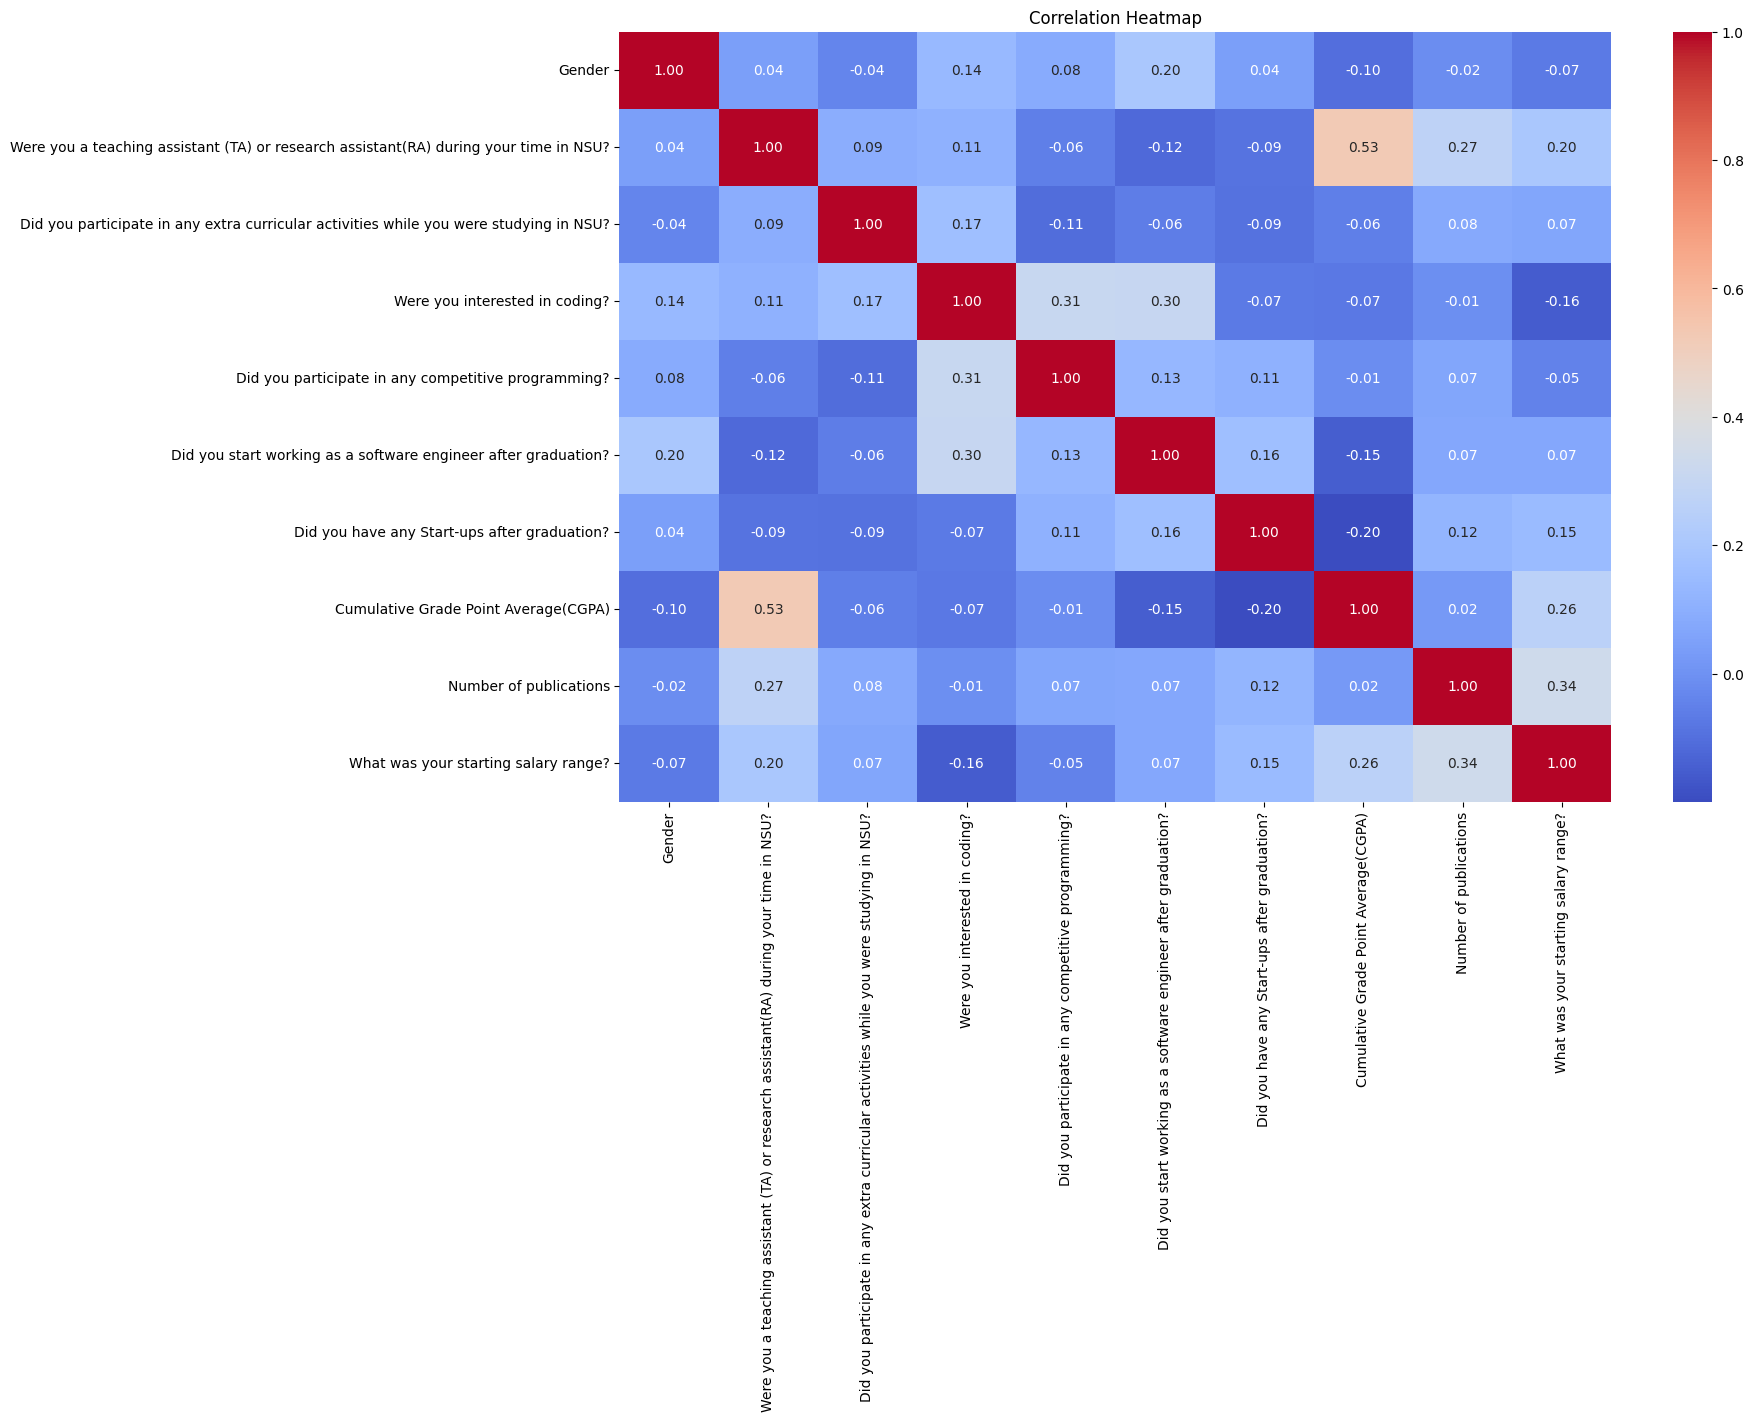

In [60]:
firstDF = pd.concat([encoded_binary,encoded_ordinal], axis=1)
correlation_matrix = firstDF.corr(numeric_only=True)

plt.figure(figsize=(16, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Now we are concating encoded_binary,encoded_ordinal and encoded_Dependable

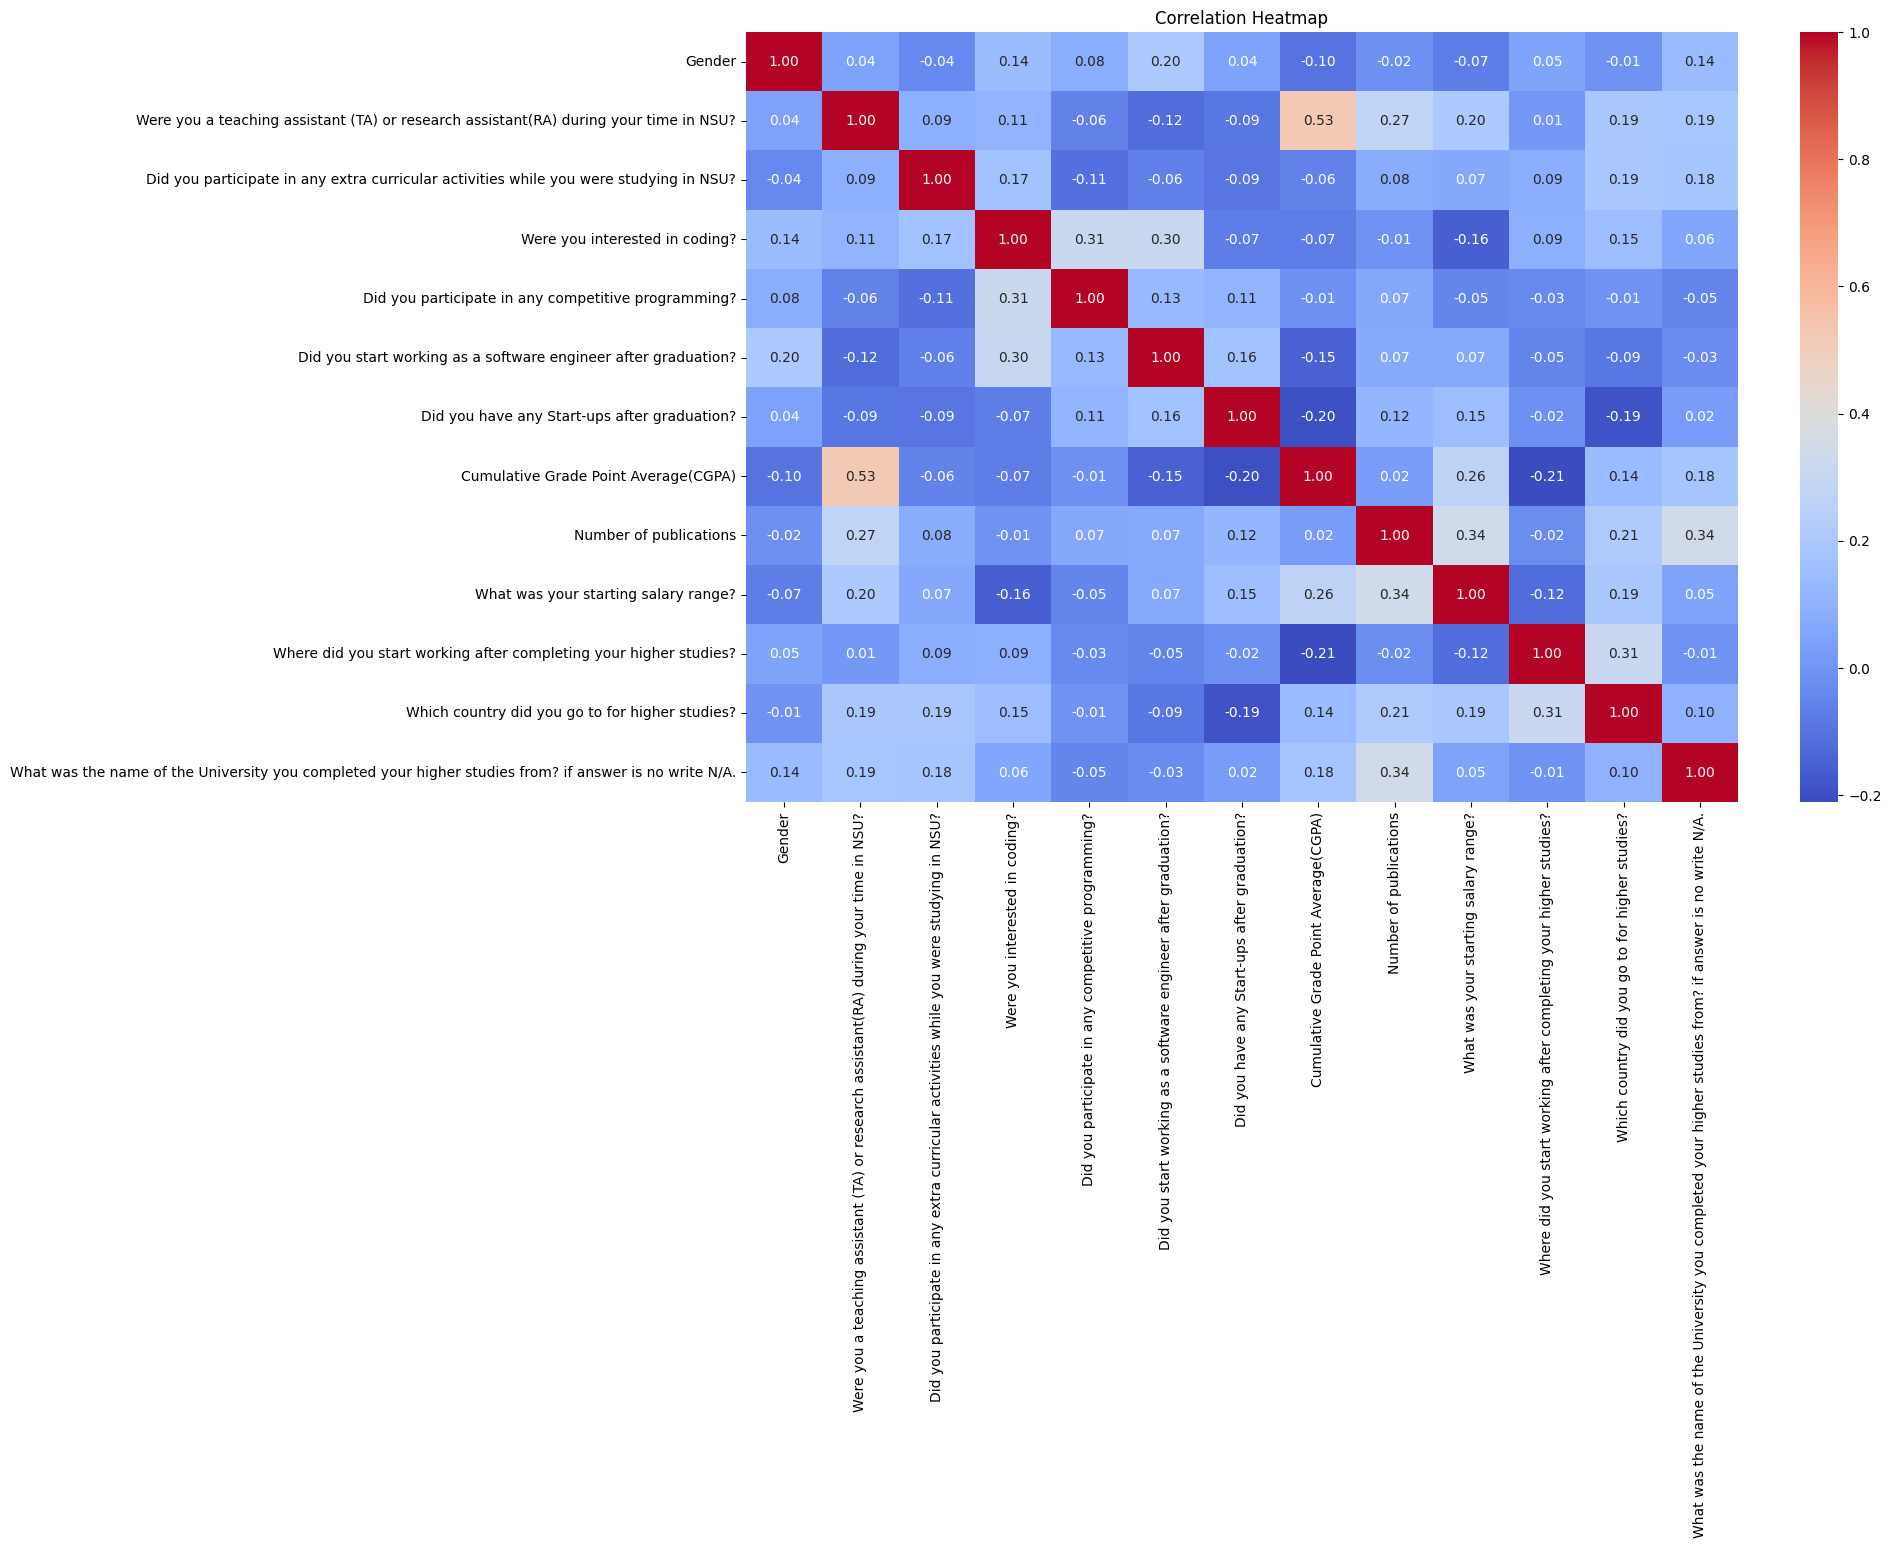

In [61]:
secondDF = pd.concat([encoded_binary,encoded_ordinal ,encoded_Dependable ], axis=1)
correlation_matrix = secondDF.corr(numeric_only=True)

plt.figure(figsize=(16, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [62]:
csv_file_path = 'encBin-endOrd-encDep.csv'

# Save the DataFrame to a CSV file
secondDF.to_csv(csv_file_path, index=False)

In [63]:
secondDF.isnull().sum()


Gender                                                                                                    0
Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?                     0
Did you participate in any extra curricular activities while you were studying in NSU?                    0
Were you interested in coding?                                                                            0
Did you participate in any competitive programming?                                                       0
Did you start working as a software engineer after graduation?                                            0
Did you have any Start-ups after graduation?                                                              0
Cumulative Grade Point Average(CGPA)                                                                      0
Number of publications                                                                                    0
What was your starting salar

## Now we concate all the datasets together

In [64]:
concatenat = pd.concat([encoded_binary,encoded_ordinal,df_PL_encoded,df_FoR_encoded, df_FW_encoded, encoded_Dependable], axis=1)
# concatenat.reset_index(drop=True, inplace=True)


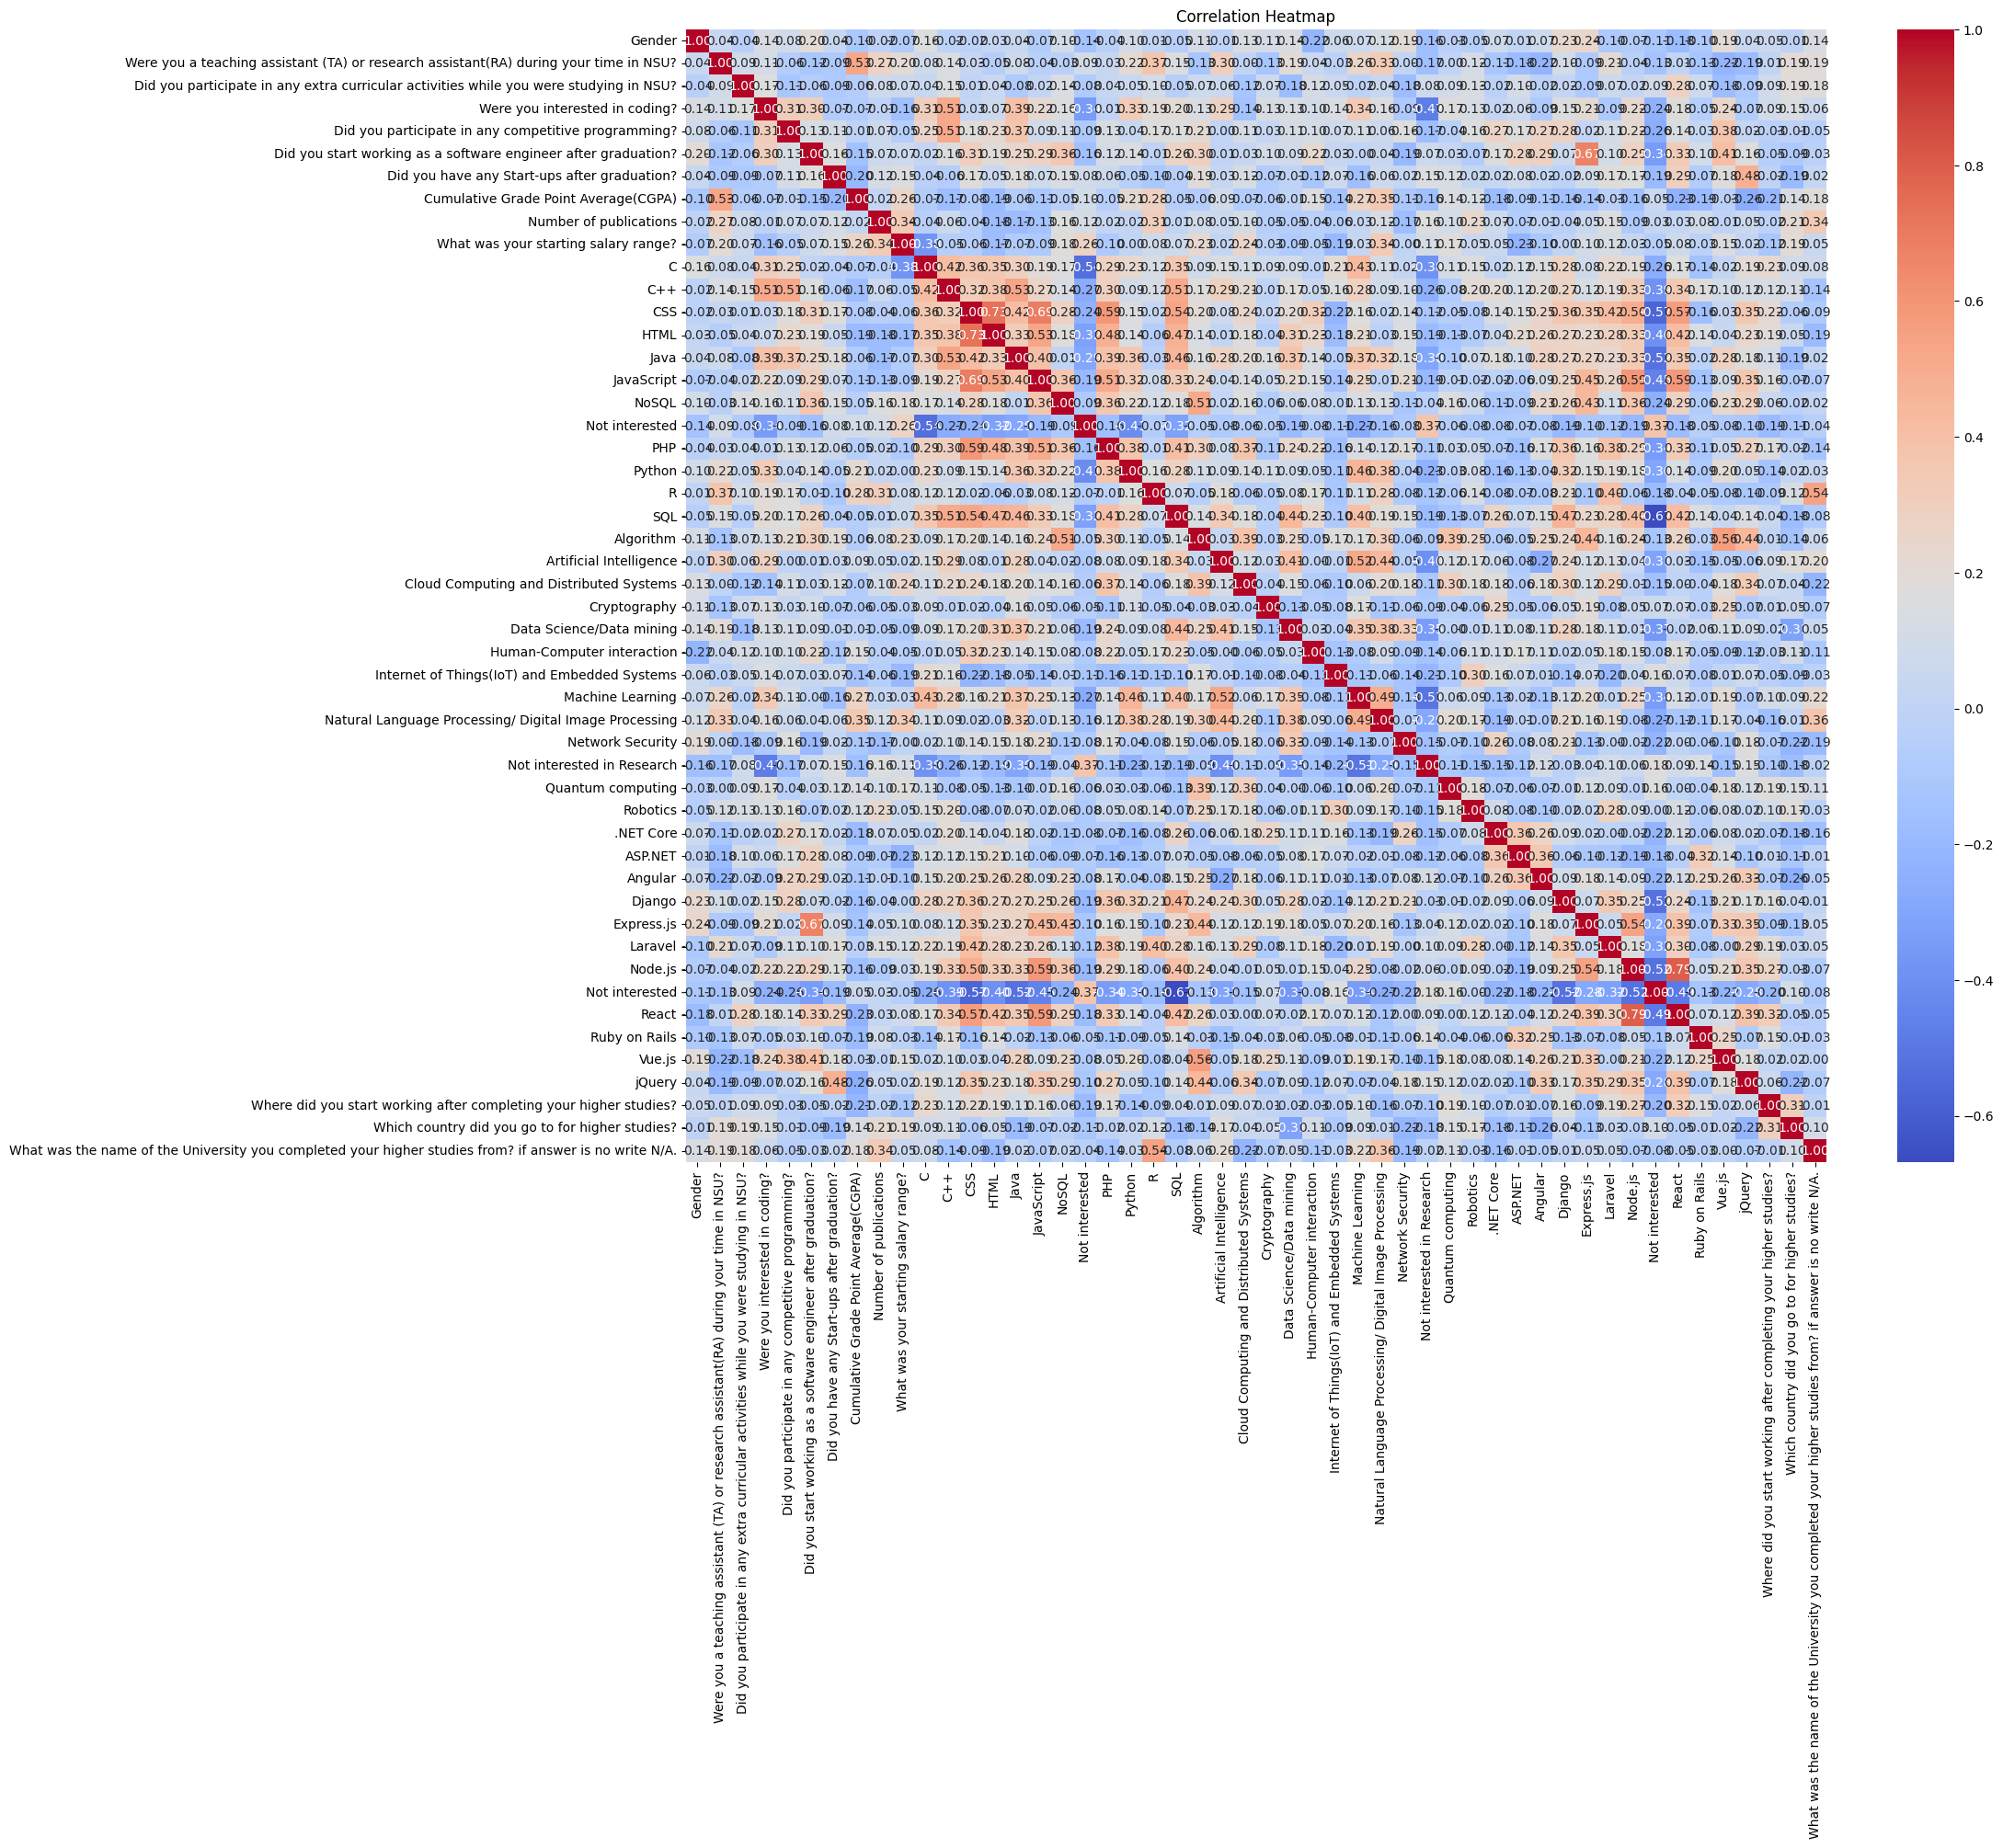

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'concatenated_df' is your concatenated DataFrame

# Calculate the correlation matrix
correlation_matrix = concatenat.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Question 6. Develop necessary hypothesis that might support your understanding on the developed datasets.
# Answer:
### 1. Students interested in coding are more likely to participate in competitive programming.
### 2. Proficiency in certain programming languages is correlated with better job placement.
### 3. Knowledge of certain frameworks is associated with industry employment.
### 4. Students who pursued higher studies in the USA are more likely to work in the industry.
### 5. Gender does not affect career choices after graduation.
### 6. Students with research interests in certain fields are more likely to be interested in coding.